# Tabular Playground 
**September 2022 | Book Sales**

**Introduction**

This data set is a collection of data detailing the amount of books sold across several companies.  The data covers four different titles, two stores, and six countries and provides daily data for several years.  This dataset represents a time series of books sold.


**Time Series:** A series of data points collected over a specified period of time.  Data points are recorded at consistent intervals over a set period of time, rather than intermittently or randomly.  This type of data is analyzed in a particular way via time series analysis.

Time series data has several properties unique to this type of data:
* Stationaity: time series data can be either stationary or non-stationary.  A stationary series is on where the values of the series are not a function of time.  In a stationary series, the statistical characteristics (e.g., mean, variance, autocorrelation) are constant over time. (An autocorrelation of a time series is the correlation of the series with its previous values).  In a stationary time series, there are no seasonal impacts.
* Trend: a time series can have upward, downward, or horizontal trend.  The trend is the general direction of the data over a long period of time.
* Seasonality: A time series may or may not have a seasonal component that repeats with respect to timing, direction, and/or magnititude. 

In [1]:
# Configure the environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge

sns.set_style('darkgrid')

In [2]:
train_df = pd.read_csv("train.csv", parse_dates=["date"])
original_train_df = train_df.copy()

test_df = pd.read_csv("test.csv", parse_dates=["date"])

In [3]:
display(train_df.head())
display(test_df.head())

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


## Clean Data

Since there isn't any missing data there is not much cleaning needed.

We will create weekly and monthly views of the dataset to explore the patterns that exist within this data.

In [4]:
# create a weekly and monthly dataset
weekly_df = train_df.groupby(["country","store", "product", pd.Grouper(key="date", freq="W")])["num_sold"].sum().rename("num_sold").reset_index()
monthly_df = train_df.groupby(["country","store", "product", pd.Grouper(key="date", freq="MS")])["num_sold"].sum().rename("num_sold").reset_index()

## Explore Data

Data is similar across the test and train datasets, with four books being sold in two stores across six countries.  There is no notable missing or duplicate data.

The training data runs from 2017 - 2020, and the test data begins in 2021.

There is a disruption to the existing pattern in early 2020 that impacts all countries and both stores.

In [5]:
print('Countries:', train_df['country'].nunique())
print('Stores:', train_df['store'].nunique())
print('Products:', train_df['product'].nunique())

Countries: 6
Stores: 2
Products: 4


In [6]:
print('Countries:', list(train_df['country'].unique()),'\n')
print('Stores:', list(train_df['store'].unique()),'\n')
print('Products:', list(train_df['product'].unique()))

Countries: ['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain'] 

Stores: ['KaggleMart', 'KaggleRama'] 

Products: ['Kaggle Advanced Techniques', 'Kaggle Getting Started', 'Kaggle Recipe Book', 'Kaggle for Kids: One Smart Goose']


In [7]:
train_df.isna().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [8]:
print(f'Duplicates in train set: {train_df.duplicated().sum()}, ({np.round(100*train_df.duplicated().sum()/len(train_df),1)}%)')

Duplicates in train set: 0, (0.0%)


Training data ranges from 2017-2020 and test covers the year 2021

In [9]:
print('train:')
print('Min date', train_df['date'].min())
print('Max date', train_df['date'].max())
print('')
print('test:')
print('Min date', train_df['date'].min())
print('Max date', train_df['date'].max())

train:
Min date 2017-01-01 00:00:00
Max date 2020-12-31 00:00:00

test:
Min date 2017-01-01 00:00:00
Max date 2020-12-31 00:00:00


In [10]:
def plot_all(df):
    f,axes = plt.subplots(2,2,figsize=(20,15), sharex = True, sharey=True)
    f.tight_layout()
    for n,prod in enumerate(df["product"].unique()):
        plot_df = df.loc[df["product"] == prod]
        sns.lineplot(data=plot_df, x="date", y="num_sold", hue="country", style="store",ax=axes[n//2,n%2])
        axes[n//2,n%2].set_title("Product: "+str(prod))

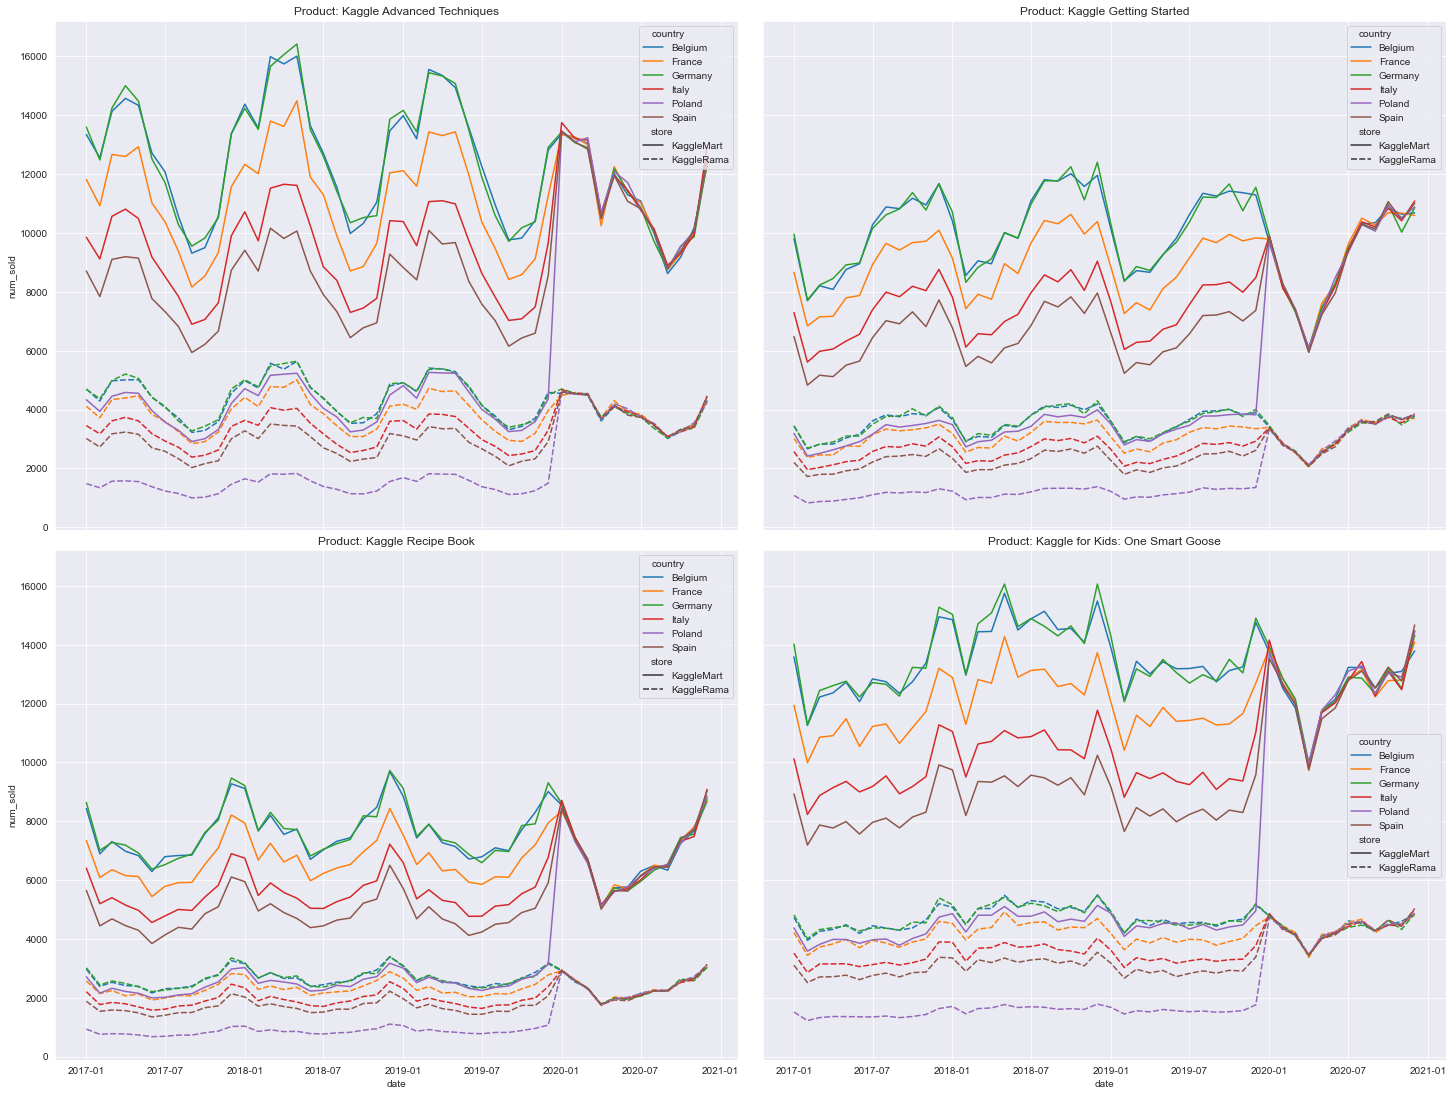

In [11]:
plot_all(monthly_df)

### Overall Sales
We begin by visualizing the combined book sales over time, where we can see an initial cyclical trend as well as the impact of some external factor in 2020.  We will continue by creating additional visualizations of this series that further decompose the series into its element parts.

Text(0.5, 1.0, '\nOverall Sales\n')

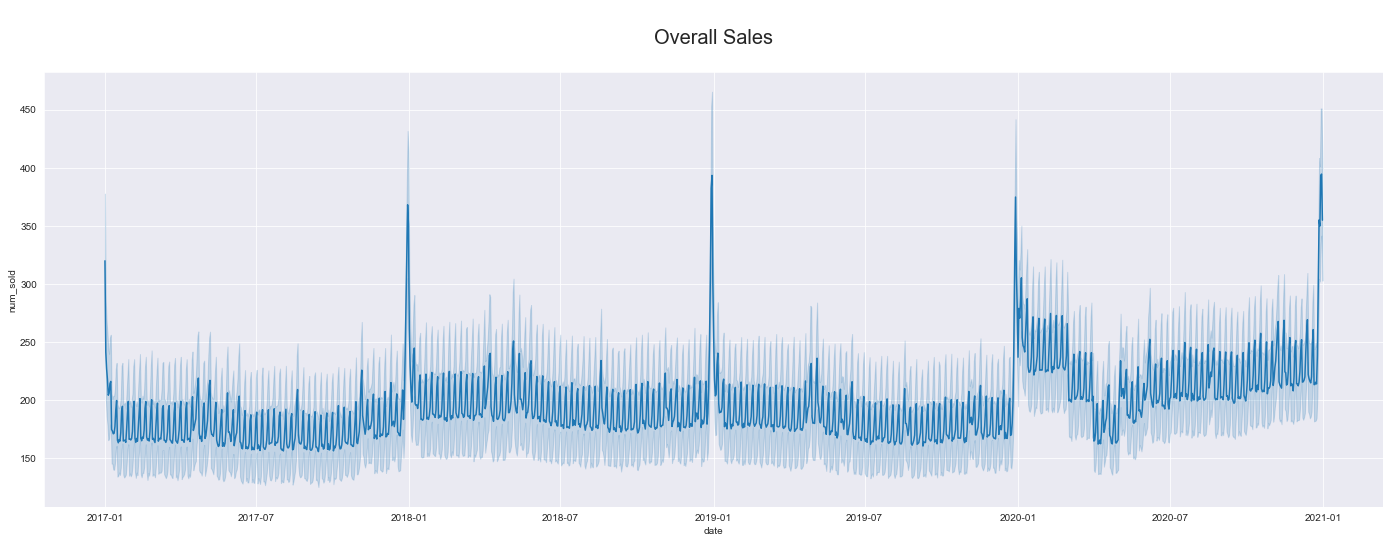

In [12]:
plt.figure(figsize=(24,8))
ax=sns.lineplot(data=train_df, x='date', y='num_sold', 
                hue=None, size=None, style=None, units=None)
ax.axes.set_title("\nOverall Sales\n",fontsize=20)

### Product
We also evaluate the products as they relate to countries; they appear to be indepedent variables.

The products appear to all have a seasonal pattern, though these differ in terms of shape and length, although they don't appear to be particularly dependent on store.

We notice the products have differing seasonal patterns in both shape and apparent timespan, although all appear to have a similar disruption in early 2020.

These trends are consistent between stores, although the two stores appear to have a high correlation.

NameError: name 'cln_train' is not defined

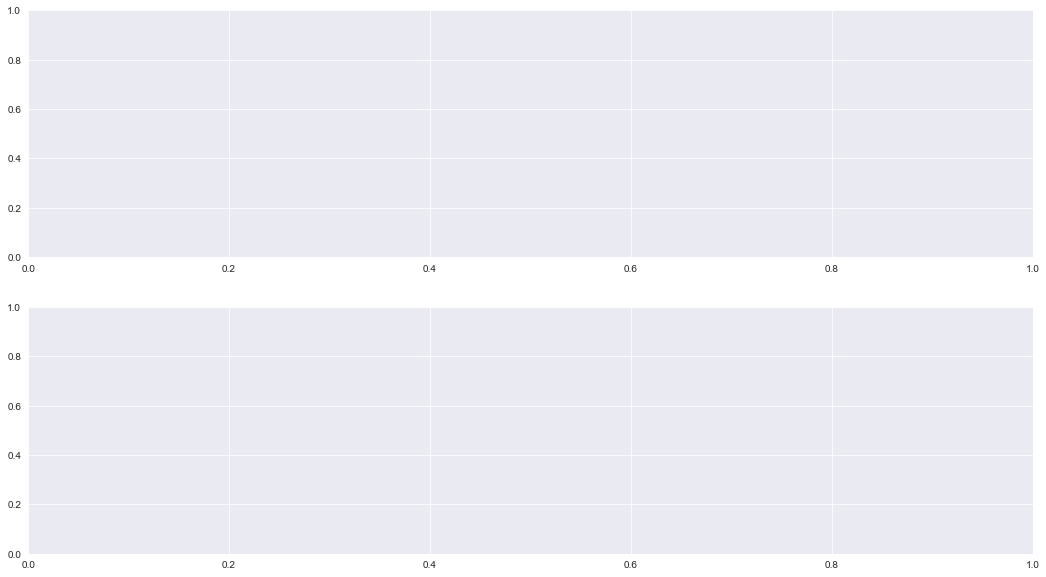

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(18, 10))
ax = ax.flatten()

for i, store in enumerate(cln_train['store'].unique()):
    subset = cln_train[cln_train['store'] == store]
    sns.lineplot(ax=ax[i], data=subset.groupby(['date','product']).sum(), x='date', y='num_sold', hue='product')
    plt.ylim([0,4500])
    
    ax[i].set_title(store)
    
    ax[i].legend(loc='upper right')
    if i!=1:
        ax[i].legend().remove()

fig.tight_layout()

Plotting the ratio of products sold, we can see a stable seasonal trend, which is uninterrupted in 2020.

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=cln_train.groupby(['product','date']).sum()/cln_train.groupby(['date']).sum(), x='date', y='num_sold', hue='product')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Ratio of Sales by Product')
plt.ylabel('Ratio')
plt.show()

### Store

Sales for the two stores are highly correlated, with each having similar shapes and experiencing the same disruption in early 2021.  The proportion of sales across the time series remains stable throughout the entire time observed.

In [ ]:
plt.figure(figsize=(24,8))
sns.lineplot(data=cln_train.groupby(['date','store']).sum(), x='date', y='num_sold', hue='store')
plt.title('Sales by Store')
plt.show()

Looking at the proportion of sales by store over time, we can see they are consistent over the entire dataset.


In [ ]:
store_weights = train_df.groupby("store")["num_sold"].sum()/train_df["num_sold"].sum()
store_weights

In [ ]:
store_ratio_over_time = (train_df.groupby(["date","store"])["num_sold"].sum() / train_df.groupby(["date"])["num_sold"].sum()).reset_index()
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = store_ratio_over_time, x="date", y="num_sold", hue="store");
ax.set_ylabel("Proportion of sales");


KaggleMart appears to consistantly have ~74.25% of the total number of sales. Lets multiply all sales in KaggleRama by a constant so they are comparable to sales in KaggleMart. If the lines between stores overlap perfectly then trend and seasonality are not unique to the store and we can ignore its effect.

In [ ]:
def plot_adjusted_store(df):
    new_df = df.copy()
    weights = store_weights.loc["KaggleMart"] / store_weights
    for store in weights.index:
        new_df.loc[new_df["store"] == store, "num_sold"] = new_df.loc[new_df["store"] == store, "num_sold"] * weights[store]
    plot_all(new_df)


In [ ]:
plot_adjusted_store(monthly_df)


The dashed and solid lines representing the different stores are overlapping for all dates.

This means trend and seasonality are not unique to the store and we can ignore its effect. All differences in sales can be explained by a single constant regardless of time.  We can forecast the store aggregated timeseries, and then disaggregating the forecasts based on historical proportions

### Country
Product sales appear to have a general, long-term seasonaility trend that is stable until 1/2020 until the pattern is interrupted and sales all merge together.  This begs the question of whether moving forward country will be a valuable input.

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(18, 20))
ax = ax.flatten()

for i, product in enumerate(cln_train['product'].unique()):
    subset = cln_train[cln_train['product'] == product]
    sns.lineplot(ax=ax[i], data=subset.groupby(['date','country']).sum(), x='date', y='num_sold', hue='country')
    plt.ylim([0,1400])
    
    ax[i].set_title(product)
    
    ax[i].legend(loc='upper right')
    if i!=2:
        ax[i].legend().remove()

fig.tight_layout()

Let's see if countries follow a similar proportion relationship.

While the countries combine to similar sale levels in 2020, they follow similar distribution patterns prior to 2020.  Can the difference in countries also be attributed to a single constant?

In [ ]:
country_weights = train_df.loc[train_df["date"] < "2020-01-01"].groupby("country")["num_sold"].sum()/train_df.loc[train_df["date"] < "2020-01-01", "num_sold"].sum()
country_weights

In [ ]:
country_ratio_over_time = (train_df.groupby(["date","country"])["num_sold"].sum() / train_df.groupby(["date"])["num_sold"].sum()).reset_index()
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = country_ratio_over_time, x="date", y="num_sold", hue="country");
ax.set_ylabel("Proportion of sales");

We will multiply all countries so they are comparable with Belgium.

In [ ]:
def plot_adjust_country(df):
    new_df = df.copy()
    
    weights = country_weights.loc["Belgium"] / country_weights
    
    for country in weights.index:
        new_df.loc[(new_df["country"] == country) & (new_df["date"] < "2020-01-01"), "num_sold"] = new_df.loc[(new_df["country"] == country) & (new_df["date"] < "2020-01-01"), "num_sold"] *  weights[country]
    #plot_country_product(new_df)
    plot_all(new_df)

In [ ]:
plot_adjust_country(monthly_df)

For the most part, the countries align on this constant variable (although Poland does appear to have some variation).

This means we can forecast the country aggregated series, and then disaggregating the forecasts based on historical proportions
As countries in 2020 behave differently we can dissagregate based on 2020 proportions (i.e. equally).

## Country & Store

Can we apply the same process to both country and store?

In [ ]:
def plot_adjust_country_store(df):
    new_df = df.copy()
    
    store_weights_ = store_weights.loc["KaggleMart"] / store_weights
    country_weights_ = country_weights.loc["Belgium"] / country_weights
    
    for country in country_weights_.index:
        new_df.loc[(new_df["country"] == country) & (new_df["date"] < "2020-01-01"), "num_sold"] = new_df.loc[(new_df["country"] == country) & (new_df["date"] < "2020-01-01"), "num_sold"] *  country_weights_[country]
    for store in store_weights_.index:
        new_df.loc[new_df["store"] == store, "num_sold"] = new_df.loc[new_df["store"] == store, "num_sold"] * store_weights_[store]
    #plot_country_product(new_df)
    plot_all(new_df)

In [ ]:
plot_adjust_country_store(monthly_df)


For country & store, this is a pretty good match.

## Product

In [ ]:
product_df = train_df.groupby(["date","product"])["num_sold"].sum().reset_index()

In [ ]:
product_ratio_df = product_df.pivot(index="date", columns="product", values="num_sold")
product_ratio_df = product_ratio_df.apply(lambda x: x/x.sum(),axis=1)
product_ratio_df = product_ratio_df.stack().rename("ratios").reset_index()
product_ratio_df.head(4)

In [ ]:
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = product_ratio_df, x="date", y="ratios", hue="product");

The product ratio shows clear sinsidual lines for each product, with a period of 2 years.


As we have a clear seasonal pattern of the ratio of sales for each product, we do not need to forecast each product individually (or treat product as a categorical variable etc.). Instead we can forecast the sum of all sales each day, then afterwards convert the forecasted sum down to the forecast for each product, using the forecasted ratios for each date.

## Create Model

All this together means we only need to forecast 2 time series:

* The total sales each day
* The ratio in number of sales for each product each day
Once we have completed the forecasts we can break the forecast down into the 3 categorical variables: Product, Country and Store.

There are atleast two important things to consider about 2020:

The number of sales from all countries becomes equal; massively increaseing the total number of products sold.
The impact of Covid, particuraly from around the dates March-May.
I am going to assume the first effect does not change in 2021. The second effect will change, to deal with this I'm going to completely exclude these months from the forecast.

In [ ]:
train_df = train_df.groupby(["date"])["num_sold"].sum().reset_index()

weekly_df = train_df.groupby([pd.Grouper(key="date", freq="W")])["num_sold"].sum().rename("num_sold").reset_index()
monthly_df = train_df.groupby([pd.Grouper(key="date", freq="MS")])["num_sold"].sum().rename("num_sold").reset_index()

In [ ]:
def plot_seasonality(df, x_axis):
    
    #remove the leap year date
    df = df.loc[df["date"] != "2020-02-29"].copy()

    df["month"] = df["date"].dt.month
    df["day_of_week"] = df["date"].dt.dayofweek
    df["day_of_year"] = df["date"].dt.dayofyear
    #account for leap year
    df["day_of_year"] = df.apply(lambda x: x["day_of_year"]-1 if x["date"] > pd.Timestamp("2020-02-29") else x["day_of_year"], axis=1)
        
    df_no_2020 = df.loc[df["date"] < "2020-01-01"]

    f,axes = plt.subplots(2,1,figsize=(20,16))
    sns.lineplot(data=df, x=x_axis, y="num_sold", ax=axes[0]);
    sns.lineplot(data=df_no_2020, x=x_axis, y="num_sold", ax=axes[1]);
    axes[0].set_title("{} Seasonality - all years".format(x_axis))
    axes[1].set_title("{} Seasonality - not including 2020".format(x_axis))

In [ ]:
plot_seasonality(train_df, "month")


In [ ]:
plot_seasonality(train_df, "day_of_week")


In [ ]:
plot_seasonality(train_df, "day_of_year")


In [ ]:
train_nocovid_df = train_df.loc[~((train_df["date"] >= "2020-03-01") & (train_df["date"] < "2020-06-01"))]
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = train_nocovid_df, x="date", y="num_sold");

In [ ]:
#get the dates to forecast for
test_total_sales_df = test_df.groupby(["date"])["row_id"].first().reset_index().drop(columns="row_id")
#keep dates for later
test_total_sales_dates = test_total_sales_df[["date"]]

In [ ]:
def feature_engineer(df):
    new_df = df.copy()
    new_df["month"] = df["date"].dt.month
    new_df["month_sin"] = np.sin(new_df['month'] * (2 * np.pi / 12))
    new_df["month_cos"] = np.cos(new_df['month'] * (2 * np.pi / 12))
    
    
    new_df["day_of_week"] = df["date"].dt.dayofweek
    new_df["day_of_week"] = new_df["day_of_week"].apply(lambda x: 0 if x<=3 else(1 if x==4 else (2 if x==5 else (3))))
    
    new_df["day_of_year"] = df["date"].dt.dayofyear
    #account for leap year
    new_df["day_of_year"] = new_df.apply(lambda x: x["day_of_year"]-1 if (x["date"] > pd.Timestamp("2020-02-29") and x["date"] < pd.Timestamp("2021-01-01"))  else x["day_of_year"], axis=1)
    new_df["important_dates"] = new_df["day_of_year"].apply(lambda x: x if x in [1,2,3,4,5,6,7,8,125,126,360,361,362,363,364,365] else 0)
       
    new_df["year"] = df["date"].dt.year
    new_df = new_df.drop(columns=["date","month","day_of_year"])
    
    new_df = pd.get_dummies(new_df, columns = ["important_dates","day_of_week"], drop_first=True)
    
    return new_df

In [ ]:
train_total_sales_df = feature_engineer(train_nocovid_df)
test_total_sales_df = feature_engineer(test_total_sales_df)

In [ ]:
display(train_total_sales_df.head(2))
display(test_total_sales_df.head(2))

In [ ]:
y = train_total_sales_df["num_sold"]
X = train_total_sales_df.drop(columns="num_sold")
X_test = test_total_sales_df

In [ ]:
from sklearn.linear_model import Ridge


model = Ridge(tol=1e-2, max_iter=1000000, random_state=0)
model.fit(X, y)
preds = model.predict(X_test)
test_total_sales_dates["num_sold"] = preds

In [ ]:
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data = pd.concat([train_df,test_total_sales_dates]).reset_index(drop=True), x="date", y="num_sold");

## Product Ratio Forecast

In [ ]:
product_ratio_2019 = product_ratio_df.loc[product_ratio_df["date"].dt.year == 2019].copy()
product_ratio_2019["mm-dd"] = product_ratio_2019["date"].dt.strftime('%m-%d')
product_ratio_2019 = product_ratio_2019.drop(columns="date")

test_product_ratio_df = test_df.copy()
test_product_ratio_df["mm-dd"] = test_product_ratio_df["date"].dt.strftime('%m-%d')

test_product_ratio_df = pd.merge(test_product_ratio_df,product_ratio_2019, how="left", on = ["mm-dd","product"])
test_product_ratio_df.head()

In [ ]:
temp_df = pd.concat([product_ratio_df,test_product_ratio_df]).reset_index(drop=True)
f,ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=temp_df, x="date", y="ratios", hue="product");

In [ ]:
test_sub_df = pd.merge(test_df, test_total_sales_dates, how="left")
test_sub_df["ratios"] = test_product_ratio_df["ratios"]
test_sub_df.head()

In [ ]:
def disaggregate_forecast(df):
    new_df = df.copy()
    
    stores_weights = original_train_df.groupby("store")["num_sold"].sum()/original_train_df["num_sold"].sum()
    country_weights = pd.Series(index = test_sub_df["country"].unique(),data = 1/6)

    for country in country_weights.index:
        new_df.loc[(new_df["country"] == country), "num_sold"] = new_df.loc[(new_df["country"] == country), "num_sold"] *  country_weights[country]
        
    for store in store_weights.index:
        new_df.loc[new_df["store"] == store, "num_sold"] = new_df.loc[new_df["store"] == store, "num_sold"] * store_weights[store]
    
    #apply product weights (which is dependent on date)
    new_df["num_sold"] = new_df["num_sold"] * new_df["ratios"]
    new_df["num_sold"] = new_df["num_sold"].round()
    new_df = new_df.drop(columns=["ratios"])
    
    return new_df

In [ ]:
final_df = disaggregate_forecast(test_sub_df)
final_df

In [ ]:
plot_all(pd.concat([cln_train,final_df]).reset_index(drop=True))


In [ ]:
submission = pd.read_csv("sample_submission.csv")
submission["num_sold"] = final_df["num_sold"]

In [ ]:
submission.to_csv('submission.csv', index = False)

## Additional Notes

### Overview

**Types of Time Series:**
When modeling a time series, the observations can be expressed as either a sum (additive time series) or a product (multiplicative time series) of the components.
* In an additive time series, Value = Base Lave + Trend + Seasonality + Error
* In a multiplicative time series, Value = Base Level * Trend * Seasonality * Error


## Feature Engineering

**Trend:** time series can have an upward, downward, or horizontal trend.  There are several ways to remove a trend from a given series:

* Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.
* Subtract the trend component obtained from time series decomposition 
* Subtract the mean
* Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

**Seasonality:** in a time series is most commonly assessed visually using a plot of the data and looking for repeated patterns over a fixed interval.  These intervals can be hourly, daily, weekly, monthly, yearly, or nearly any other interval measured by the clock or calendar.

To remove seasonality in a time series there are several approaches:

* Take a moving average with length as the seasonal window. This will smoothen in series in the process.
* Seasonal difference the series (subtract the value of previous season from the current value)
* Divide the series by the seasonal index obtained from STL decomposition

#### Stationaity
A stationary time series has statistical properties or moments (e.g., mean and variance) that do not vary in time. Stationarity, then, is the status of a stationary time series. Conversely, nonstationarity is the status of a time series whose statistical properties are changing through time.

Data points are often non-stationary or have means, variances, and covariances that change over time. Non-stationary behaviors can be trends, cycles, random walks, or combinations of the three. Non-stationary data, as a rule, are unpredictable and cannot be modeled or forecasted.

How to make a time series stationary?
We can apply some sort of transformation to make the time-series stationary. These transformation may include:

Differencing the Series (once or more)
Take the log of the series
Take the nth root of the series
Combination of the above

How to test for stationarity?
The stationarity of a series can be established by looking at the plot of the series like we did earlier.

Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.

Nevertheless, you need a method to quantitatively determine if a given series is stationary or not. This can be done using statistical tests called ‘Unit Root Tests’. There are multiple variations of this, where the tests check if a time series is non-stationary and possess a unit root.

There are multiple implementations of Unit Root tests like:

Augmented Dickey Fuller test (ADH Test)
Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
Philips Perron test (PP Test)
The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test. The below code implements these two tests using statsmodels package in python.

#### Autocorrelation

The term autocorrelation refers to the degree of similarity between A) a given time series, and B) a lagged version of itself, over C) successive time intervals. In other words, autocorrelation is intended to measure the relationship between a variable's present value and any past values that you may have access to.

When regression is performed on time series data, the errors may not be independent. Often errors are autocorrelated; that is, each error is correlated with the error immediately before it. Autocorrelation is also a symptom of systematic lack of fit. The DW option provides the Durbin-Watson d statistic to test that the autocorrelation is zero: d = \frac{ \sum_{i=2}^n (ei - e{i-1})^2}{\sum_{i=1}^n e_i^2} The value of d is close to 2 if the errors are uncorrelated. The distribution of d is reported by Durbin and Watson (1951). Tables of the distribution are found in most econometrics textbooks, such as Johnston (1972) and Pindyck and Rubinfeld (1981).

Positive autocorrelation of the errors generally tends to make the estimate of the error variance too small, so confidence intervals are too narrow and true null hypotheses are rejected with a higher probability than the stated significance level. Negative autocorrelation of the errors generally tends to make the estimate of the error variance too large, so confidence intervals are too wide and the power of significance tests is reduced. With either positive or negative autocorrelation, least-squares parameter estimates are usually not as efficient as generalized least-squares parameter estimates

Autocorrelation is the correlation between two values in a time series. In other words, the time series data correlate with themselves—hence, the name. We talk about these correlations using the term “lags.” Analysts record time-series data by measuring a characteristic at evenly spaced intervals—such as daily, monthly, or yearly. The number of intervals between the two observations is the lag. For example, the lag between the current and previous observation is one. If you go back one more interval, the lag is two, and so on.

In mathematical terms, the observations at yt and yt–k are separated by k time units. K is the lag. This lag can be days, quarters, or years depending on the nature of the data. When k=1, you’re assessing adjacent observations. For each lag, there is a correlation.

**Autocorrelation Function (ACF)**
Use the autocorrelation function (ACF) to identify which lags have significant correlations, understand the patterns and properties of the time series, and then use that information to model the time series data. From the ACF, you can assess the randomness and stationarity of a time series. You can also determine whether trends and seasonal patterns are present.

In an ACF plot, each bar represents the size and direction of the correlation. Bars that extend across the red line are statistically significant.

**Partial Autocorrelation Function (PACF)**
The partial autocorrelation function is similar to the ACF except that it displays only the correlation between two observations that the shorter lags between those observations do not explain. For example, the partial autocorrelation for lag 3 is only the correlation that lags 1 and 2 do not explain. In other words, the partial correlation for each lag is the unique correlation between those two observations after partialling out the intervening correlations.

As you saw, the autocorrelation function helps assess the properties of a time series. In contrast, the partial autocorrelation function (PACF) is more useful during the specification process for an autoregressive model. Analysts use partial autocorrelation plots to specify regression models with time series data and Auto Regressive Integrated Moving Average (ARIMA) models. I’ll focus on that aspect in posts about those methods

#### Lag Plots
A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation.



#### Smoothing

Smoothing of a time series may be useful in:

* Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
* The smoothed version of series can be used as a feature to explain the original series itself.
* Visualize the underlying trend better

Smoothing can be done in several ways:
* Take a moving average
* Do a LOESS smoothing (Localized Regression)
* Do a LOWESS smoothing (Locally Weighted Regression)

Moving average is nothing but the average of a rolling window of defined width. But you must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

## Define Model

### Popular Time Series Models

#### ARIMA
ARIMA stands for auto-regressive (AR), integrated (I), and moving average (MA), each representing a different compoent of the model.  Auto-Regressive models predict future behavior using past behavior where there is some correlation between past and future data. The formula below represents the autoregressive model. It is a modified version of the slope formula with the target value being expressed as the sum of the intercept, the product of a coefficient and the previous output, and an error correction term.

* Moving Average is a statistical method that takes the updated average of values to help cut down on noise. It takes the average over a specific interval of time. You can get it by taking different subsets of your data and finding their respective averages.  You first consider a bunch of data points and take their average. You then find the next average by removing the first value of the data and including the next value of the series.

* Integration is the difference between present and previous observations. It is used to make the time series stationary.

* Each of these values acts as a parameter for our ARIMA model. Instead of representing the ARIMA model by these various operators and models, you use parameters to represent them. These parameters are:
    + p: Previous lagged values for each time point. Derived from the Auto-Regressive Model. 
    + q: Previous lagged values for the error term. Derived from the Moving Average. 
    + d: Number of times data is differenced to make it stationary. It is the number of times it performs integration.

#### SARIMA
A SARIMA model includes seasonality and exogenous variables, providing extra power.  SARIMA stands for Seasonal-ARIMA, due to the inclusion of seaonality in the model. The auto-regressive (AR), integrated (I), and moving average (MA) parts of the model remain as that of ARIMA, with the additional robustness of seasonality. 

* The SARIMA model is very similar to the ARIMA model, but there is an additional set of autoregressive and moving average components.  The additional lags are offset by the frequency of seasonality (ex. 12 — monthly, 24 — hourly).

* SARIMA models allow for differencing data by seasonal frequency, yet also by non-seasonal differencing. Knowing which parameters are best can be made easier through automatic parameter search frameworks such as pmdarina.

* A seasonal ARIMA model uses differencing at a lag equal to the number of seasons (s) to remove additive seasonal effects. As with lag 1 differencing to remove a trend, the lag s differencing introduces a moving average term. The seasonal ARIMA model includes autoregressive and moving average terms at lag s.

### Model Evaluation

#### Rolling Statistics

A rolling analysis of a time series model is often used to assess the model's stability over time. When analyzing time series data using a statistical model, a key assumption is that the parameters of the model are constant over time.

A rolling average is a great way to visualize how the dataset is trending. For example, if a dataset provides counts by month, a window size of 12 will give us the annual rolling average.  Another good statistic to include is the rolling standard deviation to see how much the data varies from the rolling average.